# Descriptive and Statistical Analysis

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
path = "..//LungCapData2.csv"
df = pd.read_csv(path)
print(df)

     Age  LungCap  Height  Gender Smoke
0      9    3.124    57.0  female    no
1      8    3.172    67.5  female    no
2      7    3.160    54.5  female    no
3      9    2.674    53.0    male    no
4      9    3.685    57.0    male    no
..   ...      ...     ...     ...   ...
649   16   10.810    67.0    male   yes
650   15    9.181    68.0    male   yes
651   18    6.559    60.0  female    no
652   16    6.385    63.0  female   yes
653   15    7.633    66.5  female    no

[654 rows x 5 columns]


In [3]:
df.head()

,Age,LungCap,Height,Gender,Smoke
0,9,3.124,57.0,female,no
1,8,3.172,67.5,female,no
2,7,3.160,54.5,female,no
3,9,2.674,53.0,male,no
4,9,3.685,57.0,male,no


In [4]:
df.shape

(654, 5)

In [5]:
df.describe(include = "all")

,Age,LungCap,Height,Gender,Smoke
count,654.000000,654.000000,654.000000,654,654
unique,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,male,no
freq,NaN,NaN,NaN,336,589
mean,9.931193,5.910339,61.143578,NaN,NaN
std,2.953935,2.601177,5.703513,NaN,NaN
min,3.000000,0.373000,46.000000,NaN,NaN
25%,8.000000,3.943000,57.000000,NaN,NaN
50%,10.000000,5.642500,61.500000,NaN,NaN
75%,12.000000,7.355500,65.500000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
Age        654 non-null int64
LungCap    654 non-null float64
Height     654 non-null float64
Gender     654 non-null object
Smoke      654 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 25.7+ KB


#### Visualize the relationship between the interested variables
Dependent Variable = "LungCap" 

Independent Variable = "Height"

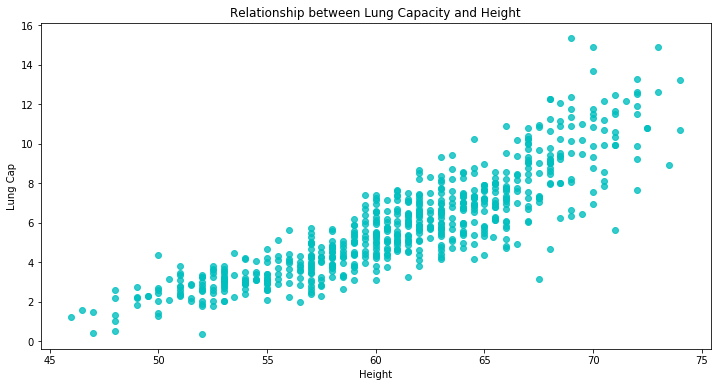

In [7]:
# scatter plot showing actual data
plt.figure(figsize=(12, 6))
plt.scatter(df['Height'], df['LungCap'], color = "c", alpha = 0.8)          
plt.xlabel('Height')
plt.ylabel('Lung Cap')
plt.title("Relationship between Lung Capacity and Height")
plt.show()

#### The plot above shows a linear relationship between Lung Capacity (LungCap) and Height; thus, It depicts a corresponding increase in LungCap with an increase in height. 

## Analysis

In [8]:
# set variable for analysis
X = df.iloc[:, 2].values  #independent variable 
y  = df.iloc[:, 1].values #dependent variable 

#### Model 1: Fitting Linear Regression to the dataset 

In [9]:
# Initialise and fit linear regression model using `scipy`
from numpy import *
from scipy.interpolate import *

In [10]:
#model1 =LungCap vs Height
model1 = polyfit(X,y,1) #linear regression using polyfit at 1 degree

In [11]:
print(model1) 

[  0.39592671 -18.2980364 ]


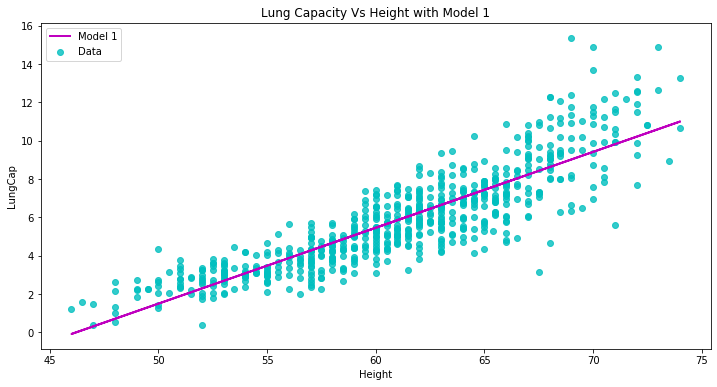

In [12]:
# visualize model 1
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color = "c", alpha = 0.8, label='Data') 
plt.plot(X, polyval(model1,X), 'm-', label='Model 1', linewidth = 2) 
plt.title("Lung Capacity Vs Height with Model 1") 
plt.xlabel('Height') 
plt.ylabel('LungCap') 
plt.legend()
plt.show()

#### Model 2: Fitting Polynomial Regression to the Dataset

In [13]:
# model2 =LungCap vs (Height + Height**2)
model2 = polyfit(X,y,2) #linear regression using polyfit at 2 degree

In [14]:
print(model2)

[ 9.46597271e-03 -7.50146522e-01  1.60806336e+01]


In [15]:
# define variable of X (height) values to fit  model2 using linspace()
Xvalue=linspace(min(X),max(X),10)
ypred2=poly1d(model2)


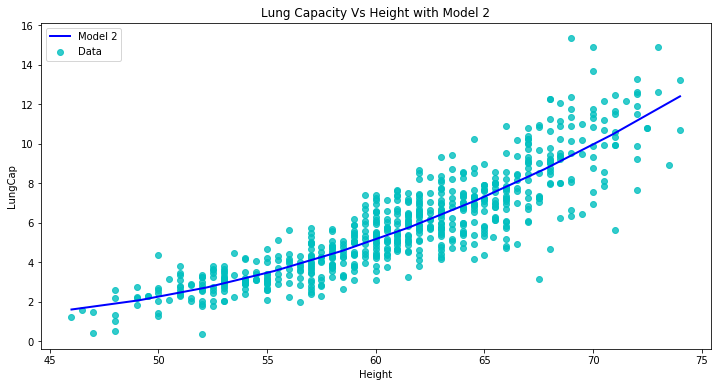

In [16]:
#visualise model2

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color = "c", alpha = 0.8, label='Data') 
plt.plot(Xvalue,ypred2(Xvalue),'b-', label='Model 2', linewidth = 2)
plt.title("Lung Capacity Vs Height with Model 2") 
plt.xlabel('Height') 
plt.ylabel('LungCap') 
plt.legend()
plt.show()

#### Model 3: Fitting Polynomial Regression to the Dataset

In [17]:
#model3 =LungCap vs (Height +  Height**2 + Height**3) 
model3 = polyfit(X,y,3) #linear regression using polyfit at 2 degree

In [18]:
print(model3)

[ 7.73897061e-05 -4.56662448e-03  9.17852135e-02 -6.29265765e-01]


In [19]:
# define variable of X (height) values to fit  model2 and model3 using linspace()
Xvalue=linspace(min(X),max(X),10)
ypred3=poly1d(model3)

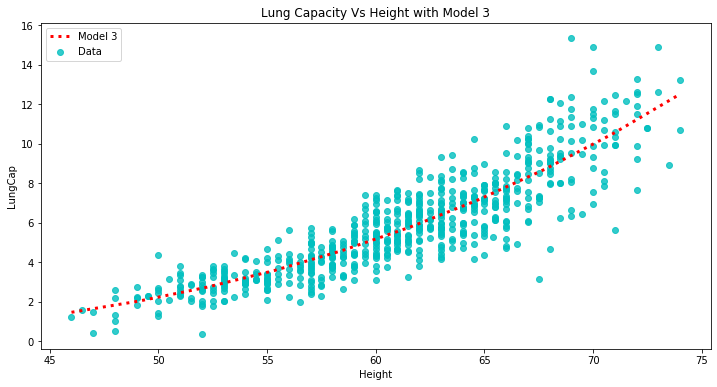

In [20]:
#visualise model3
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color = "c", alpha = 0.8, label='Data') 
plt.plot(Xvalue,ypred3(Xvalue),'r:', label='Model 3', linewidth = 3)
plt.title("Lung Capacity Vs Height with Model 3") 
plt.xlabel('Height') 
plt.ylabel('LungCap') 
plt.legend()
plt.show()

#### Visualize all models in a single plot

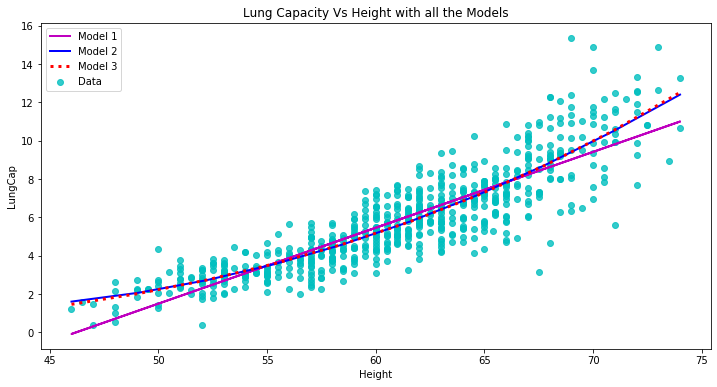

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color = "c", alpha = 0.8, label='Data') 
plt.plot(X, polyval(model1,X), 'm-', label='Model 1', linewidth = 2) 
plt.plot(Xvalue,ypred2(Xvalue),'b-', label='Model 2', linewidth = 2)
plt.plot(Xvalue,ypred3(Xvalue),'r:', label='Model 3', linewidth = 3)
plt.title("Lung Capacity Vs Height with all the Models") 
plt.xlabel('Height') 
plt.ylabel('LungCap') 
plt.legend()
plt.show()

### Fitting Model into ANOVA with Statsmodel library
anova(model1, model2)

anova(model2,model3)

In [22]:
# insert additional variable
df["Hsquared"] = df.Height ** 2
df["Hcube"] = df.Height ** 3
df.head(5)

,Age,LungCap,Height,Gender,Smoke,Hsquared,Hcube
0,9,3.124,57.0,female,no,3249.00,185193.000
1,8,3.172,67.5,female,no,4556.25,307546.875
2,7,3.160,54.5,female,no,2970.25,161878.625
3,9,2.674,53.0,male,no,2809.00,148877.000
4,9,3.685,57.0,male,no,3249.00,185193.000


In [23]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
# build model2 with statsmodel
mod = smf.ols(formula='LungCap ~ Height', data=df)
mod1 = mod.fit()
mod1

In [25]:
mod1.params

Intercept   -18.298036
Height        0.395927
dtype: float64

In [26]:
# build model2 with statsmodel
mod = smf.ols(formula='LungCap ~ Height + Hsquared', data=df)
mod2 = mod.fit()
mod2

In [27]:
mod2.params

Intercept    16.080634
Height       -0.750147
Hsquared      0.009466
dtype: float64

In [28]:
# build model2 with statsmodel
mod = smf.ols(formula='LungCap ~ Height + Hsquared + Hcube', data=df)
mod3 = mod.fit()
mod3

In [29]:
mod3.params

Intercept   -0.629266
Height       0.091785
Hsquared    -0.004567
Hcube        0.000077
dtype: float64

#### Fit Models in ANOVA

In [32]:
sm.stats.anova_lm(mod1, mod2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,652.0,1088.405828,0.0,NaN,NaN,NaN
1,651.0,998.092326,1.0,90.313502,58.906464,6.068515e-14


In [31]:
sm.stats.anova_lm(mod2,mod3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,651.0,998.092326,0.0,NaN,NaN,NaN
1,650.0,997.791669,1.0,0.300658,0.19586,0.658231


# Conclusion

After fitting the models in the ANOVA Function:

**anova(mod1,mod2)**

The p-value comparing Linear Model 1 lacks a numerical value compared to quadratic Model 2, which means a linear model is not sufficient for this dataset.

**anova(mod2,mod3)** 

The p-value comparing the quadratic Model 2 to the cubic Model 3 is less than 0.05, which means model 2 is very significant. Therefore, the quadratic fit is sufficient to describe the data efficiently. Model 3 seems unnecessary because its p-value is 0.658231; additionally, a large f value (58.906464) for model 2 depicts a significant variation among the data, variation among the height, and lung capacity. 

In Conclusion, The quadratic function (Model 2) appears to provide a reasonable fit to the data and can be used to predict the possiblity of future events efficiently.

